# Protocolo "Distributed Ballot"

O protocolo “Distributed Ballot” é uma abordagem que utiliza o emaranhamento de estados quânticos. Nesse modelo, cada eleitor recebe uma parte de um estado emaranhado, que é o seu qubit obtido de uma cédula distribuída para a realização da votação.

Na sua preparação, uma autoridade eleitoral prepara um conjunto de estados emaranhados, como os pares de Bell, e distribui um qubit de cada par para cada eleitor, enquanto a autoridade mantém o outro qubit de cada par. Ao receber o seu qubit, o eleitor realiza uma medição que representa o seu voto e o retorna à autoridade.

Ao final, a autoridade compara as suas próprias medições com as dos eleitores. O resultado agregado da eleição é computado com base nessas medições correlacionadas entre o resultado da autoridade e do eleitor.

A principal vantagem é que o emaranhamento quântico garante a coerência, o anonimato e a segurança na contagem dos votos. Dessa forma, é difícil para um invasor alterar os resultados sem que a manipulação seja detectada, pois qualquer perturbação no estado quântico de um qubit afeta instantaneamente o outro qubit emaranhado.


In [1]:
!pip install qiskit
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 87.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 69.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 80.7 MB/s eta 0:00:00


In [2]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# -- FASE 1: PREPARAÇÃO DO CENÁRIO --
ELEITORES = 10
VOTOS_SIM = 8
VOTOS_NAO = ELEITORES - VOTOS_SIM

lista_votos = [1]*VOTOS_SIM + [0]*VOTOS_NAO

print("-- Dados do cenário --")
print(f"Eleitores: {ELEITORES}")
print(f"Votos SIM reais: {VOTOS_SIM}")
print(f"Lista de votos: {lista_votos}")

-- Dados do cenário --
Eleitores: 10
Votos SIM reais: 8
Lista de votos: [1, 1, 1, 1, 1, 1, 1, 1, 0, 0]


In [4]:
# -- FASE 2: CIRCUITO QUÂNTICO --

QUBITS = ELEITORES * 2 # Como são estados emaranhados, q0 a q9 serão os pares da autoridade, e q10 a q19 serão os pares do eleitor.

db = QuantumCircuit(QUBITS, QUBITS)

for i in range(ELEITORES):
  qA = i
  qE = i + ELEITORES

  db.h(qA)
  db.cx(qA, qE)

db.barrier(label="Distribuição")

for i in range(ELEITORES):
  voto = lista_votos[i]
  qE = i + ELEITORES

  if voto == 1:
    db.x(qE)
  else:
    db.id(qE)

db.barrier(label="Votação")

for i in range(QUBITS):
  db.measure(i, i)

print("-- Circuito quântico --")
print(db.draw(fold=-1))

-- Circuito quântico --
      ┌───┐                                                   Distribuição       Votação ┌─┐                                                         
 q_0: ┤ H ├──■─────────────────────────────────────────────────────░────────────────░────┤M├─────────────────────────────────────────────────────────
      ├───┤  │                                                     ░                ░    └╥┘┌─┐                                                      
 q_1: ┤ H ├──┼────■────────────────────────────────────────────────░────────────────░─────╫─┤M├──────────────────────────────────────────────────────
      ├───┤  │    │                                                ░                ░     ║ └╥┘┌─┐                                                   
 q_2: ┤ H ├──┼────┼────■───────────────────────────────────────────░────────────────░─────╫──╫─┤M├───────────────────────────────────────────────────
      ├───┤  │    │    │                                           ░        

Resultado da simulação:  {'11001100001111001111': 1, '10011110111010000100': 1, '10000000111011111100': 1, '10101011111001010000': 1, '00010011010010110010': 1, '00001000110011011100': 1, '01101001000101011011': 1, '11000011111111110000': 1, '10010101011010101010': 1, '10101100011001001110': 1, '10010000011010111110': 2, '00000011110011110000': 1, '01001101010111001010': 1, '11011000011110011110': 1, '10101100001001001111': 1, '11110111001100100011': 1, '10010011001010110011': 1, '01100100010101101110': 1, '10110000011000111110': 1, '01101100100101001101': 1, '00100001100001111001': 1, '11010110101110100101': 1, '11100001101101111001': 1, '11010101101110101001': 1, '01011010000110010111': 1, '10100001111001111000': 1, '11110010101100110101': 1, '10111100101000001101': 1, '01101011110101010000': 1, '11101101011101001010': 1, '11100010001101110111': 1, '01011101110110001000': 1, '00101001010001011010': 1, '01000000100111111101': 1, '00101100100001001101': 1, '00010101010010101010': 1, '1

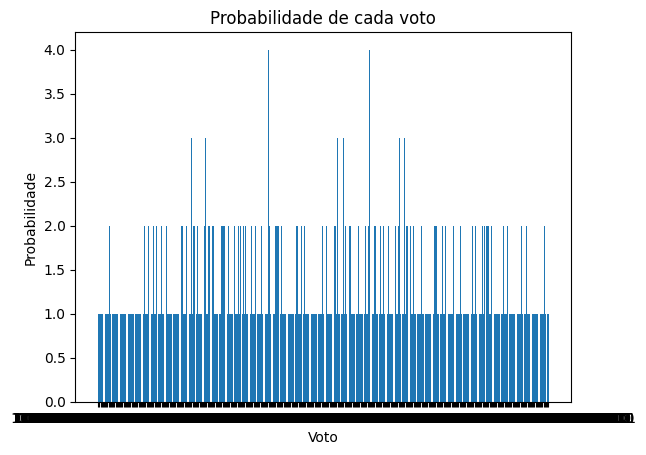

In [ ]:
# -- FASE 3: SIMULAÇÃO --

sim = AerSimulator()
job = sim.run(db, shots=500)
result = job.result()
counts = result.get_counts()

print("Resultado da simulação: ", counts)
plot_histogram(counts)

plt.title("Probabilidade de cada voto")
plt.xlabel("Voto")
plt.ylabel("Probabilidade")
plt.bar(counts.keys(), counts.values())
plt.show()

In [ ]:
# -- FASE 4: APURAÇÃO --

medicao_string = list(counts.keys())[0]
medicao_bits = [int(bit) for bit in medicao_string]

print("-- Cenário de referência --")
print(medicao_bits)

bits_autoridade = medicao_bits[0 : ELEITORES]
bits_eleitores = medicao_bits[ELEITORES : QUBITS]

votos_apurados = []
for i in range(ELEITORES):
  bit_A = bits_autoridade[i]
  bit_E = bits_eleitores[i]

  # Utilização da porta XOR para a contagem (A == E) -> 0, (A != E) -> 1
  voto_final = bit_A ^ bit_E
  votos_apurados.append(voto_final)

votos_sim_estimados = votos_apurados.count(1)

print("-- Apuração final --")
print(f"Votos SIM estimados: {votos_sim_estimados}")
print(f"Votos SIM reais: {VOTOS_SIM}")

-- Cenário de referência --
[1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1]
-- Apuração final --
Votos SIM estimados: 8
Votos SIM reais: 8
